## Multilayer Perceptron - Regressão

#### Precificação de casas em Boston

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [36]:
headers = [ str(i) for i in range(1,14) ]
headers.append('label')

data = pd.read_csv("ex3data2_altered.txt", header = None, names = headers)
data.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Normalizando os dados

In [71]:
dataNormalized = normalize(data.drop('label', axis = 1))
dataNormalized = pd.DataFrame(dataNormalized, columns = headers[:-1])
dataNormalized['label'] = data['label']
dataNormalized.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,label
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959,24.0
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362,21.6
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650,34.7
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453,33.4
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625,36.2


In [93]:
dataFeatures = dataNormalized.drop('label', axis = 1)
dataClasses = dataNormalized['label']

# Spliting Train and Test
X_temp, X_test, y_temp, y_test = train_test_split(dataFeatures.values, dataClasses.values, test_size=100, random_state=4)
# Spliting Train and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=100)

### Treinando o modelo por época

In [94]:
l_rate = 0.3
epochs = 300

model = MLPRegressor(activation='logistic', learning_rate='constant', learning_rate_init=l_rate, max_iter=1, warm_start=True)

sumErrorByEpochTrain = []
sumErrorByEpochValid = []

for epoch in range(1, epochs+1):
    
    model = model.fit(X_train, y_train)
    
    predictedTrain = model.predict(X_train)
    
    sumErrorTrain = ((y_train - predictedTrain)**2).sum()
    sumErrorByEpochTrain.append(sumErrorTrain)
#     print("Treino: Epoca {} - SumError: {}".format(epoch, sumErrorTrain))
    
    predictedValid = model.predict(X_valid)
    
    sumErrorValid = ((y_valid - predictedValid)**2).sum()
    sumErrorByEpochValid.append(sumErrorValid)
#     print("Validação: Epoca {} - SumError: {}".format(epoch, sumErrorValid))
    

/home/holandajunior/Environment/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Gráfico Época x Erro Quadrático

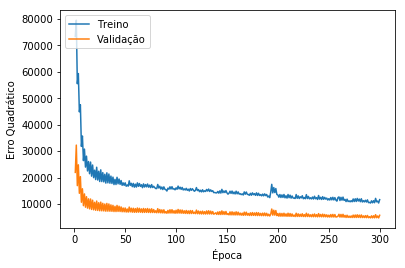

In [95]:
plt.plot(range(1,epochs+1), sumErrorByEpochTrain)
plt.plot(range(1,epochs+1), sumErrorByEpochValid)
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático')

### O gráfico acima demonstra que o modelo está em constante aprendizado, dado que para cada época o erro quadrático resultante é menor. Importante ressaltar que o erro quadrático do conjunto de validação segue o mesmo comportamento do de treino. Entende-se então que o modelo está aprendendo e generalizando bem, dado que não houve overfitting, pois o erro do conjunto de validação não volta a piorar

### Comparação de preços reais e preditos

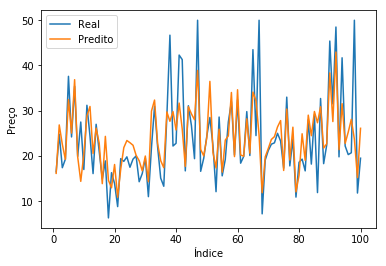

In [91]:
predictsTest = model.predict(X_test)

plt.plot(range(1,len(y_test)+1), y_test)
plt.plot(range(1,len(y_test)+1), predictsTest)
plt.legend(['Real', 'Predito'])
plt.xlabel('Índice')
plt.ylabel('Preço')

### Percebemos que o modelo prediz valores que seguem o mesmo comportamento dos preços reais, logo o modelo parece estar funcionando. No entanto, mesmo que o modelo esteja aprendendo e generalizando, seus resultados ainda não são satisfatórios, conforme o escore de teste abaixo.

### Escore da predição

In [84]:
print("Escore de teste: {}".format( model.score(X_test, y_test) ))

Escore de teste: 0.5070568116799585
